## Read data

In [1]:
import pandas as pd

df = pd.read_csv('엔솔(250326).csv', encoding='utf-8')
df

,ds,제품ID,[D0006074] 강제연신롤 인터락 속도 PV [16bit integer],[D0006310] 최대속도 PV [32bit integer],[D0006316] 리와인더 장력 테파 PV [32bit integer],[D0006318] 인피더 롤 속도비 PV [32bit integer],[D0006336] 메인롤 연속 회전 속도 PV [32bit integer],[D0006340] 메인롤 외경 PV [32bit integer],[D0006348] 메인롤 수동 속도 PV [32bit integer],[D0006366] 강제연신기 속도비 PV [32bit integer],...,강제연신기속도비차이,강제연신롤수동속도차이,강제연신롤인터락속도차이,"파단시 UW,RW 닙바 하강 시간차이",생산길이알림거리설정차이,두께측정기알람속도차이,두께측정기알람시간차이,유도가열온도DS차이,유도가열온도WS차이,[L50] 단선 [Bit]
0,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,150,170,0
1,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,150,170,0
2,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,150,170,0
3,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,150,170,0
4,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,150,170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071289,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0
1071290,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0
1071291,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0
1071292,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.columns

Index(['ds', '제품ID', '[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]',
       '[D0006310] 최대속도 PV [32bit integer]',
       '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
       '[D0006318] 인피더 롤 속도비 PV [32bit integer]',
       '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]',
       '[D0006340] 메인롤 외경 PV [32bit integer]',
       '[D0006348] 메인롤 수동 속도 PV [32bit integer]',
       '[D0006366] 강제연신기 속도비 PV [32bit integer]',
       '[D0006368] 강제연신롤 수동 속도 PV [16bit integer]',
       '[D0006810] 프레스 속도 PV [32bit integer]',
       '[D0006814] 언와인더 장력 PV [32bit integer]',
       '[D0006816] 강제연신기 장력 PV [32bit integer]',
       '[D0006818] 리와인더 장력 PV [32bit integer]',
       '[D0006822] 리와인더 길이 카운터 [32bit integer]',
       '[D0006860] 구동부측 GAP [32bit integer]',
       '[D0006862] 작업자측 GAP [32bit integer]',
       '[D0006864] 구동부측 이전 GAP [32bit integer]',
       '[D0006866] 작업자측 이전 GAP [32bit integer]',
       '[D0006890] 구동부측 가압 [16bit integer]',
       '[D0006892] 작업자측 가압 [32bit integer]',
       '[D0006

### preview data

In [3]:
import pandas as pd

df = pd.read_csv('엔솔(250326).csv', encoding='utf-8')

# Convert 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Sort dataframe by timestamp
df.sort_values(by='ds', inplace=True)

# Identify fault start events: L50 changing from 0 to 1
df['L50_prev'] = df['[L50] 단선 [Bit]'].shift(1, fill_value=0)

fault_events = df[(df['[L50] 단선 [Bit]'] == 1) & (df['L50_prev'] == 0)]['ds']

# Define the window size (e.g., 1 minute prior to fault)
window_size = pd.Timedelta(minutes=1)

# Initialize labels as '0' (normal)
df['Label'] = 0

# Label the data points within the defined window before each fault as '1' (fault-approaching)
for fault_time in fault_events:
    window_start = fault_time - window_size
    df.loc[(df['ds'] >= window_start) & (df['ds'] < fault_time), 'Label'] = 1

# Drop helper column
df.drop(columns=['L50_prev'], inplace=True)

# Verify the labeling
print(df['Label'].value_counts())

# Save labeled dataset for next steps
df.to_csv('labeled_fault_data.csv', index=False)


Label
0    1057677
1      13617
Name: count, dtype: int64


In [4]:
exclude_cols = [
    'ds', '제품ID', '[L50] 단선 [Bit]','Label',                                             
    '[M000664] 언와인더 E.P.C POS. END [Bit]',
    '[M000665] 리와인더 E.P.C POS. END [Bit]', '[M000681] 두께측정 편차 알람 [Bit]',
    '[M005490] 언와인더 E.P.C 좌 5 [Bit]', '[M005491] 언와인더 E.P.C 좌 4 [Bit]',
    '[M005492] 언와인더 E.P.C 좌 3 [Bit]', '[M005493] 언와인더 E.P.C 좌 2 [Bit]',
    '[M005494] 언와인더 E.P.C 좌 1 [Bit]', '[M005495] 언와인더 E.P.C 중앙 [Bit]',
    '[M005496] 언와인더 E.P.C 우 1 [Bit]', '[M005497] 언와인더 E.P.C 우 2 [Bit]',
    '[M005498] 언와인더 E.P.C 우 3 [Bit]', '[M005499] 언와인더 E.P.C 우 4 [Bit]',
    '[M005500] 언와인더 E.P.C 우 5 [Bit]', '[M005680] 리와인더 E.P.C 좌 5 [Bit]',
    '[M005681] 리와인더 E.P.C 좌 4 [Bit]', '[M005682] 리와인더 E.P.C 좌 3 [Bit]',
    '[M005683] 리와인더 E.P.C 좌 2 [Bit]', '[M005684] 리와인더 E.P.C 좌 1 [Bit]',
    '[M005685] 리와인더 E.P.C 중앙 [Bit]', '[M005686] 리와인더 E.P.C 우 1 [Bit]',
    '[M005687] 리와인더 E.P.C 우 2 [Bit]', '[M005688] 리와인더 E.P.C 우 3 [Bit]',
    '[M005689] 리와인더 E.P.C 우 4 [Bit]', '[M005690] 리와인더 E.P.C 우 5 [Bit]'
]

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_cols)


In [5]:

# Define rolling windows (10, 30, 60 seconds)
rolling_windows = [10, 30, 60]

# Feature engineering: rolling mean, std, and differences
for col in numeric_cols:
    for window in rolling_windows:
        df[f'{col}_mean_{window}s'] = df[col].rolling(window=window, min_periods=1).mean()
        df[f'{col}_std_{window}s'] = df[col].rolling(window=window, min_periods=1).std()
        df[f'{col}_diff_{window}s'] = df[col] - df[col].shift(window)

# Handle missing values (fill using backward fill as it's time series)
df.fillna(method='bfill', inplace=True)

# Save the engineered features dataset
df.to_csv('engineered_fault_data.csv', index=False)

# Quick overview
print(df.shape)
print(df.head())

C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\3759633960.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_mean_{window}s'] = df[col].rolling(window=window, min_periods=1).mean()
C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\3759633960.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_std_{window}s'] = df[col].rolling(window=window, min_periods=1).std()
C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\3759633960.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

(1071294, 489)
                   ds                    제품ID  \
0 2025-01-16 14:37:59  1442317968824182248224   
1 2025-01-16 14:37:59  1442317968824182248224   
2 2025-01-16 14:38:00  1442317968824182248224   
3 2025-01-16 14:38:00  1442317968824182248224   
4 2025-01-16 14:38:00  1442317968824182248224   

   [D0006074] 강제연신롤 인터락 속도 PV [16bit integer]  \
0                                          30   
1                                          30   
2                                          30   
3                                          30   
4                                          30   

   [D0006310] 최대속도 PV [32bit integer]  \
0                                  60   
1                                  60   
2                                  60   
3                                  60   
4                                  60   

   [D0006316] 리와인더 장력 테파 PV [32bit integer]  \
0                                        10   
1                                        10   
2      

In [6]:
df.columns


Index(['ds', '제품ID', '[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]',
       '[D0006310] 최대속도 PV [32bit integer]',
       '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
       '[D0006318] 인피더 롤 속도비 PV [32bit integer]',
       '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]',
       '[D0006340] 메인롤 외경 PV [32bit integer]',
       '[D0006348] 메인롤 수동 속도 PV [32bit integer]',
       '[D0006366] 강제연신기 속도비 PV [32bit integer]',
       ...
       '파단시 UW,RW 닙바 하강 시간차이_diff_60s', '프레스속도차이_mean_10s', '프레스속도차이_std_10s',
       '프레스속도차이_diff_10s', '프레스속도차이_mean_30s', '프레스속도차이_std_30s',
       '프레스속도차이_diff_30s', '프레스속도차이_mean_60s', '프레스속도차이_std_60s',
       '프레스속도차이_diff_60s'],
      dtype='object', length=489)

In [7]:
correlations = df.corr()['Label'].abs().sort_values(ascending=False)
print(correlations.head(20))


Label                                              1.000000
리와인더장력차이_mean_60s                                  0.124991
[D0006818] 리와인더 장력 PV [32bit integer]_mean_60s     0.124991
[D0006818] 리와인더 장력 PV [32bit integer]_mean_30s     0.124865
리와인더장력차이_mean_30s                                  0.124865
[D0006818] 리와인더 장력 PV [32bit integer]_mean_10s     0.124660
리와인더장력차이_mean_10s                                  0.124660
리와인더장력차이                                           0.124472
[D0006818] 리와인더 장력 PV [32bit integer]              0.124472
[D0006814] 언와인더 장력 PV [32bit integer]_mean_60s     0.122448
언와인더장력차이_mean_60s                                  0.122448
[D0006814] 언와인더 장력 PV [32bit integer]_mean_30s     0.122322
언와인더장력차이_mean_30s                                  0.122322
언와인더장력차이_mean_10s                                  0.122120
[D0006814] 언와인더 장력 PV [32bit integer]_mean_10s     0.122120
언와인더장력차이                                           0.121923
[D0006814] 언와인더 장력 PV [32bit integer]   

In [14]:
from scipy.stats import mannwhitneyu

significant_features = []
for col in numeric_cols:
    group_fault = df[df['Label'] == 1][col]
    group_normal = df[df['Label'] == 0][col]
    stat, p_value = mannwhitneyu(group_fault, group_normal)
    if p_value < 0.05:
        significant_features.append((col, p_value))

significant_features.sort(key=lambda x: x[1])
print(significant_features[:20])


[('[D0006810] 프레스 속도 PV [32bit integer]', 0.0), ('[D0006814] 언와인더 장력 PV [32bit integer]', 0.0), ('[D0006816] 강제연신기 장력 PV [32bit integer]', 0.0), ('[D0006818] 리와인더 장력 PV [32bit integer]', 0.0), ('[D0006860] 구동부측 GAP [32bit integer]', 0.0), ('[D0006862] 작업자측 GAP [32bit integer]', 0.0), ('[D0006864] 구동부측 이전 GAP [32bit integer]', 0.0), ('[D0006866] 작업자측 이전 GAP [32bit integer]', 0.0), ('[D0006894] 구동부측 역압 [32bit integer]', 0.0), ('[D0006896] 작업자측 역압 [32bit integer]', 0.0), ('[D0006934] 리와인더 댄서 위치. [16bit integer]', 0.0), ('[D0006936] 연신기 댄서 위치. [32bit integer]', 0.0), ('강제연신기장력차이', 0.0), ('리와인더장력차이', 0.0), ('언와인더장력차이', 0.0), ('유도가열온도DS차이', 0.0), ('유도가열온도WS차이', 0.0), ('프레스속도차이', 0.0), ('[D0006926] 언와인더 댄서 위치. [16bit integer]', 9.380806514599613e-95), ('[D0006822] 리와인더 길이 카운터 [32bit integer]', 2.1551615399648483e-31)]


In [15]:
significant_features[:20]

[('[D0006810] 프레스 속도 PV [32bit integer]', 0.0),
 ('[D0006814] 언와인더 장력 PV [32bit integer]', 0.0),
 ('[D0006816] 강제연신기 장력 PV [32bit integer]', 0.0),
 ('[D0006818] 리와인더 장력 PV [32bit integer]', 0.0),
 ('[D0006860] 구동부측 GAP [32bit integer]', 0.0),
 ('[D0006862] 작업자측 GAP [32bit integer]', 0.0),
 ('[D0006864] 구동부측 이전 GAP [32bit integer]', 0.0),
 ('[D0006866] 작업자측 이전 GAP [32bit integer]', 0.0),
 ('[D0006894] 구동부측 역압 [32bit integer]', 0.0),
 ('[D0006896] 작업자측 역압 [32bit integer]', 0.0),
 ('[D0006934] 리와인더 댄서 위치. [16bit integer]', 0.0),
 ('[D0006936] 연신기 댄서 위치. [32bit integer]', 0.0),
 ('강제연신기장력차이', 0.0),
 ('리와인더장력차이', 0.0),
 ('언와인더장력차이', 0.0),
 ('유도가열온도DS차이', 0.0),
 ('유도가열온도WS차이', 0.0),
 ('프레스속도차이', 0.0),
 ('[D0006926] 언와인더 댄서 위치. [16bit integer]', 9.380806514599613e-95),
 ('[D0006822] 리와인더 길이 카운터 [32bit integer]', 2.1551615399648483e-31)]

In [13]:
from sklearn.ensemble import RandomForestClassifier

X = df[numeric_cols]
y = df['Label']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

[D0006822] 리와인더 길이 카운터 [32bit integer]    0.143685
[D0006932] 리와인더 외경[mm] [32bit integer]    0.115737
[D0006862] 작업자측 GAP [32bit integer]       0.096460
[D0006866] 작업자측 이전 GAP [32bit integer]    0.094215
[D0006860] 구동부측 GAP [32bit integer]       0.093599
[D0006864] 구동부측 이전 GAP [32bit integer]    0.082411
[D0006936] 연신기 댄서 위치. [32bit integer]     0.043038
유도가열온도WS차이                                0.033911
강제연신기장력차이                                 0.032221
[D0006816] 강제연신기 장력 PV [32bit integer]    0.032100
[D0006814] 언와인더 장력 PV [32bit integer]     0.027093
리와인더장력차이                                  0.026706
언와인더장력차이                                  0.026114
[D0006818] 리와인더 장력 PV [32bit integer]     0.025934
[D0006934] 리와인더 댄서 위치. [16bit integer]    0.024852
[D0006810] 프레스 속도 PV [32bit integer]      0.024371
유도가열온도DS차이                                0.023595
프레스속도차이                                   0.023538
[D0006926] 언와인더 댄서 위치. [16bit integer]    0.011021
[D0006894] 구동부측 역압 [32bit integ

In [12]:
#calculate rate of change (temporal derivative) for numeric columns
for col in numeric_cols:
    df[f'{col}_rate_of_change'] = df[col].diff()  # difference from previous timestamp (1 second interval)

# Handle missing values by filling them (time series backward fill)
df.fillna(method='bfill', inplace=True)

# Save new dataset
df.to_csv('engineered_rate_of_change.csv', index=False)

C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\331750588.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rate_of_change'] = df[col].diff()  # difference from previous timestamp (1 second interval)
C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\331750588.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rate_of_change'] = df[col].diff()  # difference from previous timestamp (1 second interval)
C:\Users\sakso\AppData\Local\Temp\ipykernel_30204\331750588.py:3: PerformanceWarning: DataFrame is highl

In [11]:
numeric_cols

Index(['[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]',
       '[D0006310] 최대속도 PV [32bit integer]',
       '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
       '[D0006318] 인피더 롤 속도비 PV [32bit integer]',
       '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]',
       '[D0006340] 메인롤 외경 PV [32bit integer]',
       '[D0006348] 메인롤 수동 속도 PV [32bit integer]',
       '[D0006366] 강제연신기 속도비 PV [32bit integer]',
       '[D0006368] 강제연신롤 수동 속도 PV [16bit integer]',
       '[D0006810] 프레스 속도 PV [32bit integer]',
       '[D0006814] 언와인더 장력 PV [32bit integer]',
       '[D0006816] 강제연신기 장력 PV [32bit integer]',
       '[D0006818] 리와인더 장력 PV [32bit integer]',
       '[D0006822] 리와인더 길이 카운터 [32bit integer]',
       '[D0006860] 구동부측 GAP [32bit integer]',
       '[D0006862] 작업자측 GAP [32bit integer]',
       '[D0006864] 구동부측 이전 GAP [32bit integer]',
       '[D0006866] 작업자측 이전 GAP [32bit integer]',
       '[D0006890] 구동부측 가압 [16bit integer]',
       '[D0006892] 작업자측 가압 [32bit integer]',
       '[D0006894] 구동부측 역압 [

### Using Dynamic Time Warping

In [2]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='fastdtw')

# Load your labeled data
df = pd.read_csv('엔솔_전처리_파단직전재추출_0401.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.sort_values('ds', inplace=True)

df.fillna(method='bfill', inplace=True)
df.dropna(inplace=True)

# Identify fault event timestamps clearly
df['L50_shift'] = df['[L50] 단선 [Bit]'].shift(1, fill_value=0)
fault_times = df[(df['[L50] 단선 [Bit]'] == 1) & (df['L50_shift'] == 0)]['ds']

fault_segments = []
normal_segments = []

window_duration = pd.Timedelta(minutes=1)

# Extract fault segments carefully
for fault_time in fault_times:
    segment = df[(df['ds'] >= fault_time - window_duration) & (df['ds'] < fault_time)]
    if len(segment) == 60:
        fault_segments.append(segment)

# Extract normal segments carefully
normal_periods = df[df['[L50] 단선 [Bit]'] == 0]
normal_times = normal_periods['ds'].iloc[::60]  # pick normal points every 60 seconds

for start_time in normal_times:
    segment = df[(df['ds'] >= start_time) & (df['ds'] < start_time + window_duration)]
    if len(segment) == 60:
        normal_segments.append(segment)

# Equalize segment counts
min_segments = min(len(fault_segments), len(normal_segments))
fault_segments = fault_segments[:min_segments]
normal_segments = normal_segments[:min_segments]

# Check segments count
print(f"Fault segments: {len(fault_segments)}")
print(f"Normal segments: {len(normal_segments)}")

# DTW calculation safely
variable = '[D0006814] 언와인더 장력 PV [32bit integer]'

distances = []
for fault_seg, normal_seg in zip(fault_segments, normal_segments):
    fault_seq = fault_seg[variable].values
    normal_seq = normal_seg[variable].values
    
    # Explicit NaN check before DTW
    if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
        continue  # skip segments with NaNs

    distance, path = fastdtw(fault_seq, normal_seq)
    distances.append(distance)

if len(distances) > 0:
    average_distance = np.mean(distances)
    print(f"Average DTW Distance for {variable}: {average_distance}")
else:
    print("No valid segments after filtering. Check your data carefully.")


C:\Users\sakso\AppData\Local\Temp\ipykernel_10316\1174859117.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


KeyError: '[L50] 단선 [Bit]'

In [2]:
df['interval'] = df['ds'].diff().dt.total_seconds()
print(df['interval'].value_counts().head(10))

interval
0.0     863450
1.0     205786
13.0       831
14.0       825
17.0       196
18.0       134
26.0        26
25.0        14
27.0         9
28.0         5
Name: count, dtype: int64


In [3]:
df.columns

Index(['ds', '제품ID', '[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]',
       '[D0006310] 최대속도 PV [32bit integer]',
       '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
       '[D0006318] 인피더 롤 속도비 PV [32bit integer]',
       '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]',
       '[D0006340] 메인롤 외경 PV [32bit integer]',
       '[D0006348] 메인롤 수동 속도 PV [32bit integer]',
       '[D0006366] 강제연신기 속도비 PV [32bit integer]',
       '[D0006368] 강제연신롤 수동 속도 PV [16bit integer]',
       '[D0006810] 프레스 속도 PV [32bit integer]',
       '[D0006814] 언와인더 장력 PV [32bit integer]',
       '[D0006816] 강제연신기 장력 PV [32bit integer]',
       '[D0006818] 리와인더 장력 PV [32bit integer]',
       '[D0006822] 리와인더 길이 카운터 [32bit integer]',
       '[D0006860] 구동부측 GAP [32bit integer]',
       '[D0006862] 작업자측 GAP [32bit integer]',
       '[D0006864] 구동부측 이전 GAP [32bit integer]',
       '[D0006866] 작업자측 이전 GAP [32bit integer]',
       '[D0006890] 구동부측 가압 [16bit integer]',
       '[D0006892] 작업자측 가압 [32bit integer]',
       '[D0006

In [ ]:
df

KeyError: '제품ID'

In [6]:
## filter by product ID

df.loc[df['제품ID'] == '1442317968824182248224']

,ds,제품ID,[D0006074] 강제연신롤 인터락 속도 PV [16bit integer],[D0006310] 최대속도 PV [32bit integer],[D0006316] 리와인더 장력 테파 PV [32bit integer],[D0006318] 인피더 롤 속도비 PV [32bit integer],[D0006336] 메인롤 연속 회전 속도 PV [32bit integer],[D0006340] 메인롤 외경 PV [32bit integer],[D0006348] 메인롤 수동 속도 PV [32bit integer],[D0006366] 강제연신기 속도비 PV [32bit integer],...,강제연신롤인터락속도차이,"파단시 UW,RW 닙바 하강 시간차이",생산길이알림거리설정차이,두께측정기알람속도차이,두께측정기알람시간차이,유도가열온도DS차이,유도가열온도WS차이,[L50] 단선 [Bit],L50_shift,interval
0,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,NaN
1,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
2,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,1.0
3,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
4,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071291,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,1.0
1071292,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0
1071289,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0
1071290,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0


In [25]:
df_1 = df.loc[df['제품ID'] == '1442317968824182248224'].copy()
df_1
# ## resample to 1 second intervals

# df_1.set_index('ds', inplace=True)
# df_1 = df_1.resample('1S').mean().interpolate(method='linear')
# df_1.reset_index(inplace=True)

# # Ensure that non-numeric columns are excluded before resampling
# numeric_cols = df_1.select_dtypes(include=['number']).columns
# df_1 = df_1[numeric_cols].resample('1S').mean().interpolate(method='linear')

# df_1.reset_index(inplace=True)
# df_1

,ds,제품ID,[D0006074] 강제연신롤 인터락 속도 PV [16bit integer],[D0006310] 최대속도 PV [32bit integer],[D0006316] 리와인더 장력 테파 PV [32bit integer],[D0006318] 인피더 롤 속도비 PV [32bit integer],[D0006336] 메인롤 연속 회전 속도 PV [32bit integer],[D0006340] 메인롤 외경 PV [32bit integer],[D0006348] 메인롤 수동 속도 PV [32bit integer],[D0006366] 강제연신기 속도비 PV [32bit integer],...,강제연신롤인터락속도차이,"파단시 UW,RW 닙바 하강 시간차이",생산길이알림거리설정차이,두께측정기알람속도차이,두께측정기알람시간차이,유도가열온도DS차이,유도가열온도WS차이,[L50] 단선 [Bit],L50_shift,interval
0,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,NaN
1,2025-01-16 14:37:59,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
2,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,1.0
3,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
4,2025-01-16 14:38:00,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,150,170,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071291,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,1.0
1071292,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0
1071289,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0
1071290,2025-01-21 05:42:06,1442317968824182248224,30,60,10,100,50,7500,40,0,...,0,0,0,0,0,0,0,0,0,0.0


In [26]:
df_1.drop(columns=['interval', '제품ID'], inplace=True)

In [27]:
numeric_cols = numeric_cols = [
    '[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]',
    '[D0006310] 최대속도 PV [32bit integer]',
    '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
    '[D0006318] 인피더 롤 속도비 PV [32bit integer]',
    '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]',
    '[D0006340] 메인롤 외경 PV [32bit integer]',
    '[D0006348] 메인롤 수동 속도 PV [32bit integer]',
    '[D0006366] 강제연신기 속도비 PV [32bit integer]',
    '[D0006368] 강제연신롤 수동 속도 PV [16bit integer]',
    '[D0006810] 프레스 속도 PV [32bit integer]',
    '[D0006814] 언와인더 장력 PV [32bit integer]',
    '[D0006816] 강제연신기 장력 PV [32bit integer]',
    '[D0006818] 리와인더 장력 PV [32bit integer]',
    '[D0006822] 리와인더 길이 카운터 [32bit integer]',
    '[D0006860] 구동부측 GAP [32bit integer]',
    '[D0006862] 작업자측 GAP [32bit integer]',
    '[D0006864] 구동부측 이전 GAP [32bit integer]',
    '[D0006866] 작업자측 이전 GAP [32bit integer]',
    '[D0006890] 구동부측 가압 [16bit integer]',
    '[D0006892] 작업자측 가압 [32bit integer]',
    '[D0006894] 구동부측 역압 [32bit integer]',
    '[D0006896] 작업자측 역압 [32bit integer]',
    '[D0006926] 언와인더 댄서 위치. [16bit integer]',
    '[D0006932] 리와인더 외경[mm] [32bit integer]',
    '[D0006934] 리와인더 댄서 위치. [16bit integer]',
    '[D0006936] 연신기 댄서 위치. [32bit integer]',
    '프레스속도차이', '최대속도차이', '언와인더장력차이', '리와인더장력차이', '리와인더장력테파차이', '인피더롤속도비차이',
    '압연폭차이', '메인롤연속회전속도차이', '메인롤외경차이', '메인롤수동속도차이', '강제연신기장력차이', 
    '강제연신기속도비차이', '강제연신롤수동속도차이', '강제연신롤인터락속도차이', '파단시 UW,RW 닙바 하강 시간차이',
    '생산길이알림거리설정차이', '두께측정기알람속도차이', '두께측정기알람시간차이', '유도가열온도DS차이', '유도가열온도WS차이']

In [28]:
df_1['ds'] = pd.to_datetime(df_1['ds'])
df_1.sort_values('ds', inplace=True)
df_1.set_index('ds', inplace=True)

# Resample numeric columns
df_1_numeric = df_1[numeric_cols].resample('1S').mean().interpolate(method='linear')

# Resample the categorical column using mode
df_1_l50 = df_1['[L50] 단선 [Bit]'].resample('1S').apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Combine the numeric and categorical columns
df_1 = pd.concat([df_1_numeric, df_1_l50], axis=1)

# Reset the index
df_1.reset_index(inplace=True)

In [48]:
# Identify fault event timestamps clearly
df_1['L50_shift'] = df_1['[L50] 단선 [Bit]'].shift(1, fill_value=0)
fault_times = df_1[(df_1['[L50] 단선 [Bit]'] == 1) & (df_1['L50_shift'] == 0)]['ds']

fault_segments = []
normal_segments = []

window_duration = pd.Timedelta(minutes=1)

# Extract fault segments carefully
for fault_time in fault_times:
    segment = df_1[(df_1['ds'] >= fault_time - window_duration) & (df_1['ds'] < fault_time)]
    if len(segment) == 60:
        fault_segments.append(segment)

# Extract normal segments carefully
normal_periods = df_1[df_1['[L50] 단선 [Bit]'] == 0]
normal_times = normal_periods['ds'].iloc[::60]  # pick normal points every 10 seconds

for start_time in normal_times:
    segment = df_1[(df_1['ds'] >= start_time) & (df_1['ds'] < start_time + window_duration)]
    if len(segment) == 60:
        normal_segments.append(segment)

# Equalize segment counts
min_segments = min(len(fault_segments), len(normal_segments))
fault_segments = fault_segments[:min_segments]
normal_segments = normal_segments[:min_segments]

# Check segments count
print(f"Fault segments: {len(fault_segments)}")
print(f"Normal segments: {len(normal_segments)}")

# DTW calculation safely
variable = '[D0006814] 언와인더 장력 PV [32bit integer]'

distances = []
for fault_seg, normal_seg in zip(fault_segments, normal_segments):
    fault_seq = fault_seg[variable].values
    normal_seq = normal_seg[variable].values
    
    # Explicit NaN check before DTW
    if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
        continue  # skip segments with NaNs

    distance, path = fastdtw(fault_seq, normal_seq)
    distances.append(distance)

if len(distances) > 0:
    average_distance = np.mean(distances)
    print(f"Average DTW Distance for {variable}: {average_distance}")
else:
    print("No valid segments after filtering. Check your data carefully.")


Fault segments: 17
Normal segments: 17
Average DTW Distance for [D0006814] 언와인더 장력 PV [32bit integer]: 8378.566677440205


In [49]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw

# Identify fault event timestamps clearly
df_1['L50_shift'] = df_1['[L50] 단선 [Bit]'].shift(1, fill_value=0)
fault_times = df_1[(df_1['[L50] 단선 [Bit]'] == 1) & (df_1['L50_shift'] == 0)]['ds']

fault_segments = []
normal_segments = []

# ⚠️ Change duration to 10 seconds
window_duration = pd.Timedelta(seconds=10)

# Extract 10-second fault segments
for fault_time in fault_times:
    segment = df_1[(df_1['ds'] >= fault_time - window_duration) & (df_1['ds'] < fault_time)]
    if len(segment) == 10:  # 10 seconds with 1-second interval = 10 rows
        fault_segments.append(segment)

# Extract 10-second normal segments
normal_periods = df_1[df_1['[L50] 단선 [Bit]'] == 0]
normal_times = normal_periods['ds'].iloc[::10]  # pick every 10 seconds

for start_time in normal_times:
    segment = df_1[(df_1['ds'] >= start_time) & (df_1['ds'] < start_time + window_duration)]
    if len(segment) == 10:
        normal_segments.append(segment)

# Equalize segment counts
min_segments = min(len(fault_segments), len(normal_segments))
fault_segments = fault_segments[:min_segments]
normal_segments = normal_segments[:min_segments]

# Check segments count
print(f"Fault segments: {len(fault_segments)}")
print(f"Normal segments: {len(normal_segments)}")

# DTW calculation for one variable
variable = '[D0006814] 언와인더 장력 PV [32bit integer]'
distances = []

for fault_seg, normal_seg in zip(fault_segments, normal_segments):
    fault_seq = fault_seg[variable].values
    normal_seq = normal_seg[variable].values
    
    if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
        continue

    distance, path = fastdtw(fault_seq, normal_seq)
    distances.append(distance)

# Output average distance
if len(distances) > 0:
    average_distance = np.mean(distances)
    print(f"Average DTW Distance for {variable}: {average_distance}")
else:
    print("No valid segments after filtering. Check your data carefully.")


Fault segments: 17
Normal segments: 17
Average DTW Distance for [D0006814] 언와인더 장력 PV [32bit integer]: 1375.0710932857992


## Speed related features

Speed-related:

[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]

[D0006310] 최대속도 PV [32bit integer]

[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]

[D0006348] 메인롤 수동 속도 PV [32bit integer]

[D0006366] 강제연신기 속도비 PV [32bit integer]

[D0006368] 강제연신롤 수동 속도 PV [16bit integer]

[D0006810] 프레스 속도 PV [32bit integer]

In [50]:
speed_variables = ['[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]', '[D0006310] 최대속도 PV [32bit integer]', '[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]', 
                   '[D0006348] 메인롤 수동 속도 PV [32bit integer]', '[D0006366] 강제연신기 속도비 PV [32bit integer]',
                   '[D0006368] 강제연신롤 수동 속도 PV [16bit integer]', '[D0006810] 프레스 속도 PV [32bit integer]']


# Calculate DTW distances for speed variables

distances_speed = {}

for variable in speed_variables:
    distances = []
    for fault_seg, normal_seg in zip(fault_segments, normal_segments):
        fault_seq = fault_seg[variable].values
        normal_seq = normal_seg[variable].values
        
        # Explicit NaN check before DTW
        if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
            continue  # skip segments with NaNs

        distance, path = fastdtw(fault_seq, normal_seq)
        distances.append(distance)

    if len(distances) > 0:
        average_distance = np.mean(distances)
        distances_speed[variable] = average_distance
    else:
        distances_speed[variable] = None
        print(f"No valid segments for {variable}. Check your data carefully.")

distances_speed_sorted = sorted(distances_speed.items(), key=lambda x: x[1] if x[1] is not None else float('inf'))
for var, dist in distances_speed_sorted:
    print(f"{var}: {dist}")

[D0006074] 강제연신롤 인터락 속도 PV [16bit integer]: 0.0
[D0006310] 최대속도 PV [32bit integer]: 0.0
[D0006336] 메인롤 연속 회전 속도 PV [32bit integer]: 0.0
[D0006348] 메인롤 수동 속도 PV [32bit integer]: 0.0
[D0006366] 강제연신기 속도비 PV [32bit integer]: 0.0
[D0006368] 강제연신롤 수동 속도 PV [16bit integer]: 0.0
[D0006810] 프레스 속도 PV [32bit integer]: 345.51192810457513


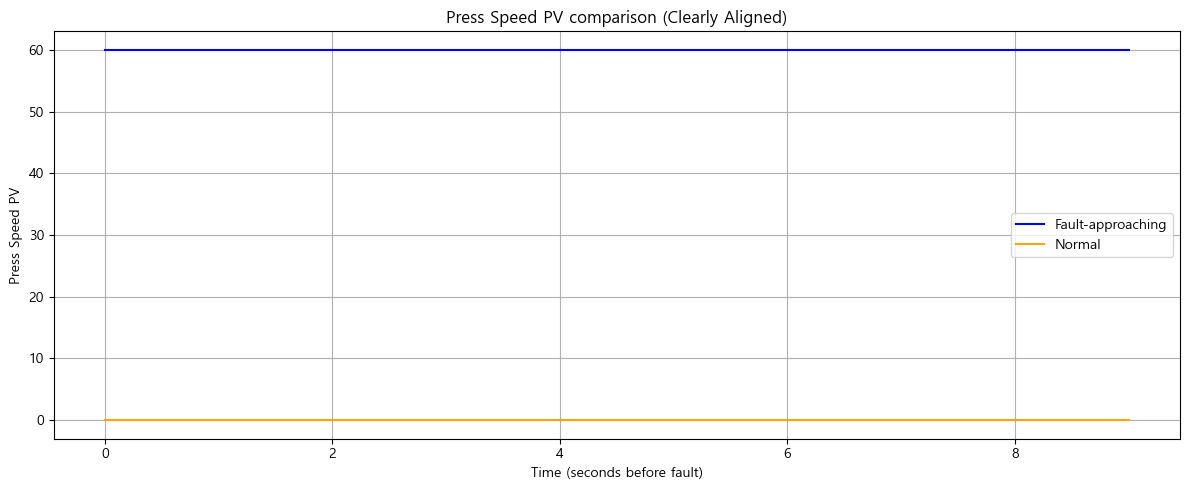

In [56]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Extract the specific segments clearly
fault_seq = fault_segments[0]['[D0006810] 프레스 속도 PV [32bit integer]'].values
normal_seq = normal_segments[0]['[D0006810] 프레스 속도 PV [32bit integer]'].values

# Since segments are both 10 points (10 seconds), create a unified x-axis
time_points = np.arange(len(fault_seq))  # 0 to 10 seconds clearly

# Plotting clearly aligned sequences
plt.figure(figsize=(12, 5))
plt.plot(time_points, fault_seq, label='Fault-approaching', color='blue')
plt.plot(time_points, normal_seq, label='Normal', color='orange')

plt.title('Press Speed PV comparison (Clearly Aligned)')
plt.xlabel('Time (seconds before fault)')
plt.ylabel('Press Speed PV')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


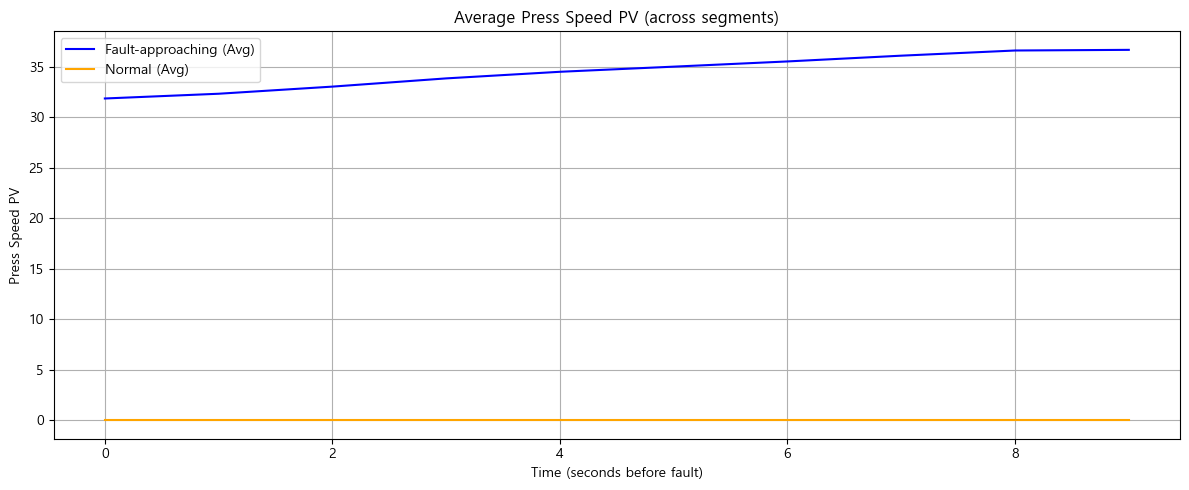

In [57]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
# Stack all segments
fault_matrix = np.array([seg['[D0006810] 프레스 속도 PV [32bit integer]'].values for seg in fault_segments])
normal_matrix = np.array([seg['[D0006810] 프레스 속도 PV [32bit integer]'].values for seg in normal_segments])

# Compute means
fault_mean = fault_matrix.mean(axis=0)
normal_mean = normal_matrix.mean(axis=0)

plt.figure(figsize=(12, 5))
plt.plot(fault_mean, label='Fault-approaching (Avg)', color='blue')
plt.plot(normal_mean, label='Normal (Avg)', color='orange')
plt.title('Average Press Speed PV (across segments)')
plt.xlabel('Time (seconds before fault)')
plt.ylabel('Press Speed PV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Tension Related Variable

[D0006316] 리와인더 장력 테파 PV [32bit integer] - No valid DTW data.


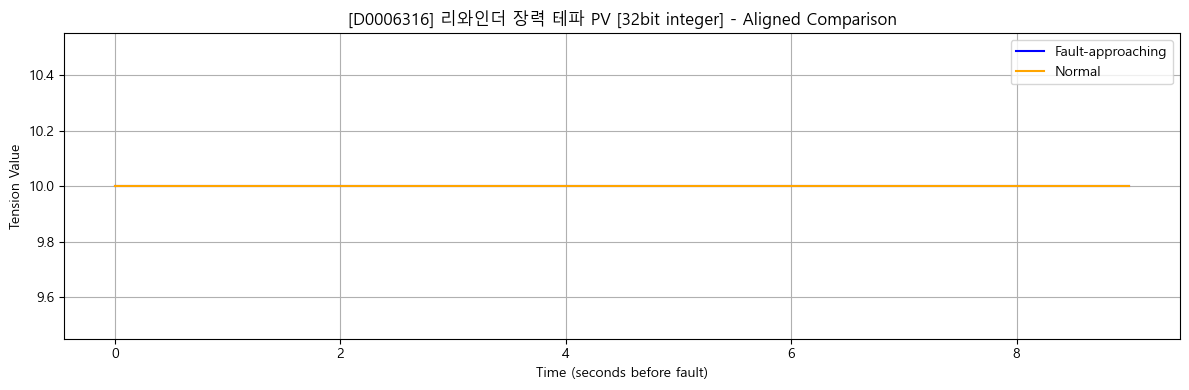

[D0006814] 언와인더 장력 PV [32bit integer] - Average DTW Distance: 1375.07


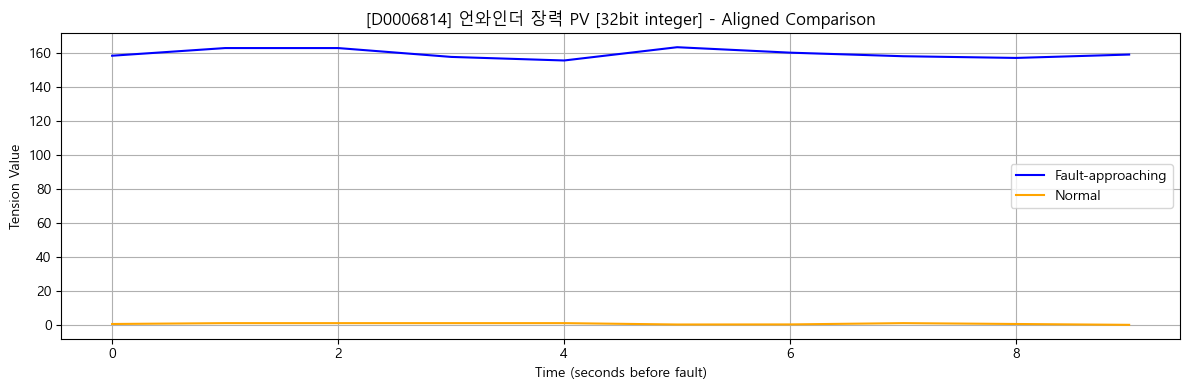

[D0006816] 강제연신기 장력 PV [32bit integer] - Average DTW Distance: 3600.72


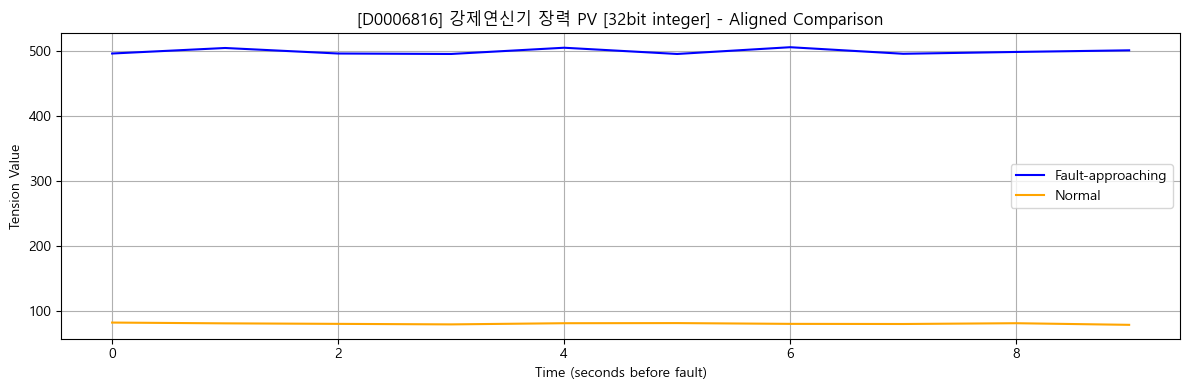

[D0006818] 리와인더 장력 PV [32bit integer] - Average DTW Distance: 1885.88


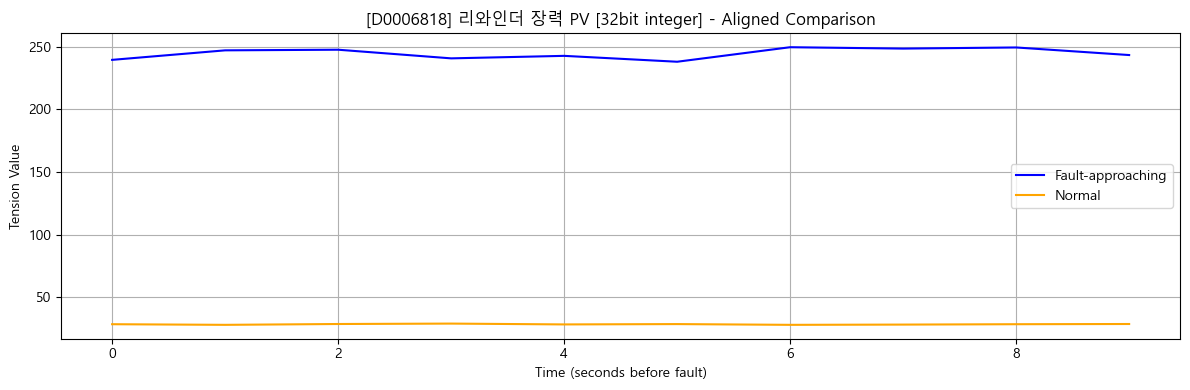

In [58]:
tension_vars = [
    '[D0006316] 리와인더 장력 테파 PV [32bit integer]',
    '[D0006814] 언와인더 장력 PV [32bit integer]',
    '[D0006816] 강제연신기 장력 PV [32bit integer]',
    '[D0006818] 리와인더 장력 PV [32bit integer]'
]

from fastdtw import fastdtw
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

for var in tension_vars:
    # DTW distance calculation
    distances = []
    for fault_seg, normal_seg in zip(fault_segments, normal_segments):
        fault_seq = fault_seg[var].values
        normal_seq = normal_seg[var].values

        # Safety check
        if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
            continue

        distance, path = fastdtw(fault_seq, normal_seq)
        distances.append(distance)

    avg_distance = np.mean(distances) if distances else None
    print(f"{var} - Average DTW Distance: {avg_distance:.2f}" if avg_distance else f"{var} - No valid DTW data.")

    # Aligned visualization
    time_axis = np.arange(len(fault_segments[0]))
    fault_seq = fault_segments[0][var].values
    normal_seq = normal_segments[0][var].values

    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, fault_seq, label='Fault-approaching', color='blue')
    plt.plot(time_axis, normal_seq, label='Normal', color='orange')
    plt.title(f"{var} - Aligned Comparison")
    plt.xlabel('Time (seconds before fault)')
    plt.ylabel('Tension Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## size and gap

[D0006340] 메인롤 외경 PV [32bit integer] - No valid DTW data.


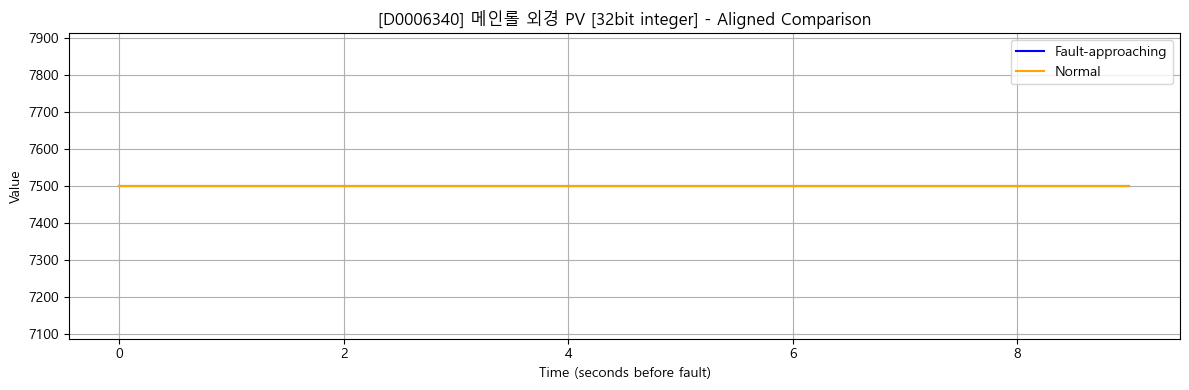

[D0006932] 리와인더 외경[mm] [32bit integer] - Average DTW Distance: 2785.39


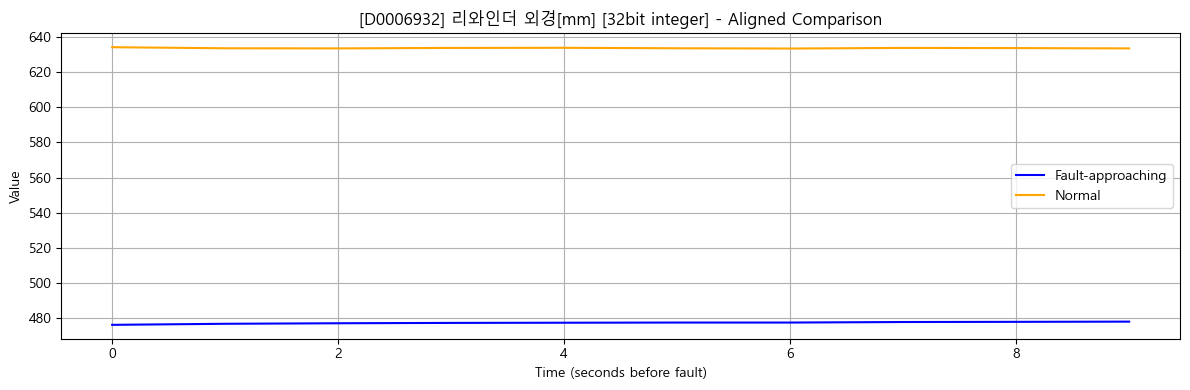

[D0006860] 구동부측 GAP [32bit integer] - Average DTW Distance: 1442.84


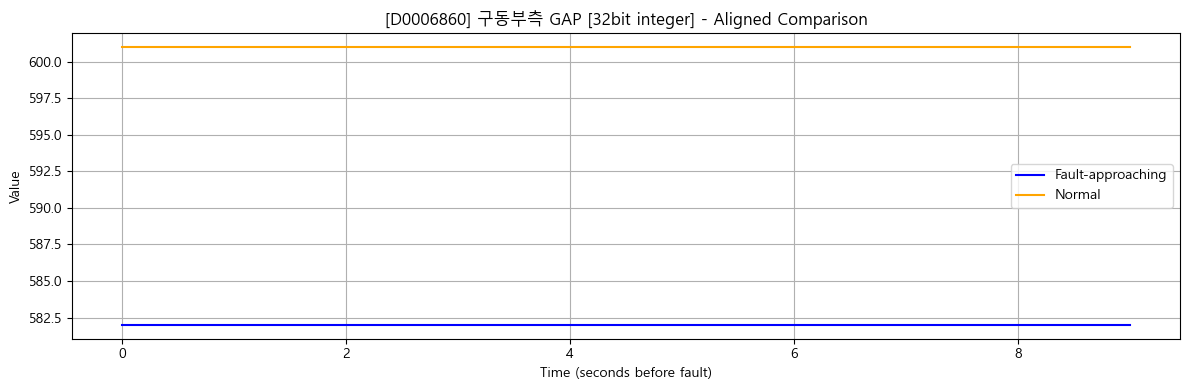

[D0006862] 작업자측 GAP [32bit integer] - Average DTW Distance: 1370.43


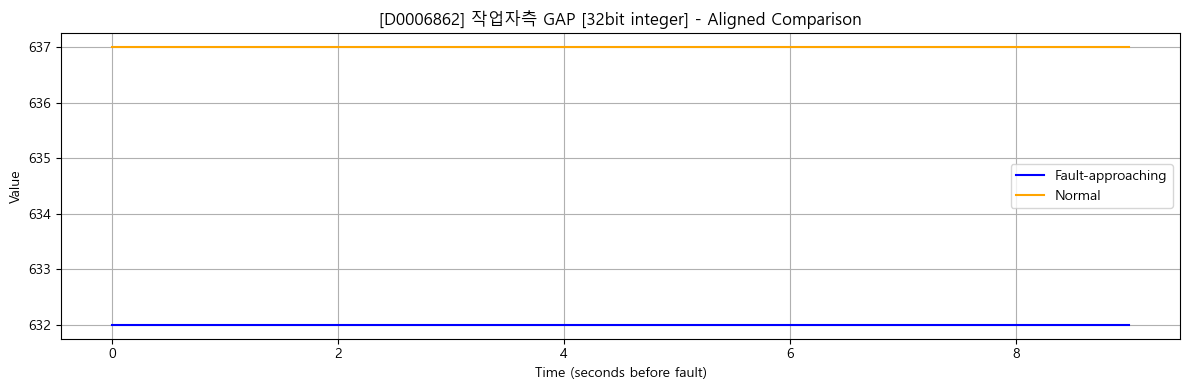

[D0006864] 구동부측 이전 GAP [32bit integer] - Average DTW Distance: 240.10


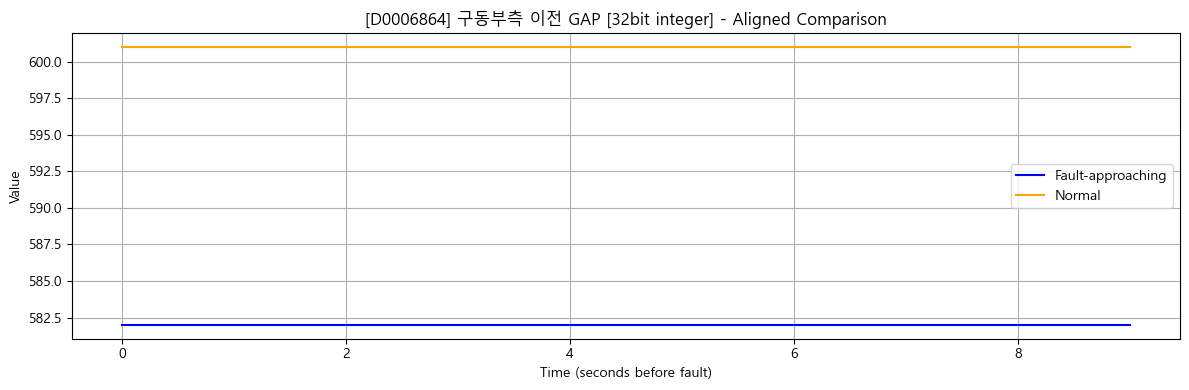

[D0006866] 작업자측 이전 GAP [32bit integer] - Average DTW Distance: 207.76


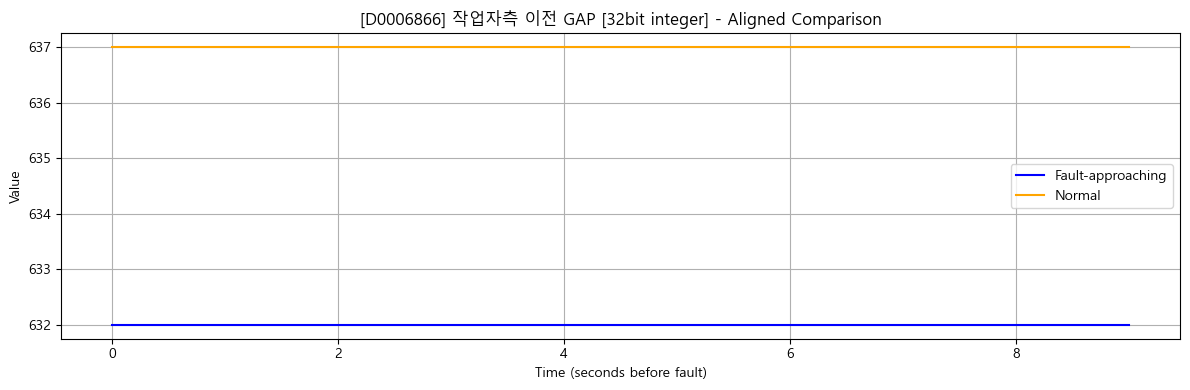

[D0006890] 구동부측 가압 [16bit integer] - No valid DTW data.


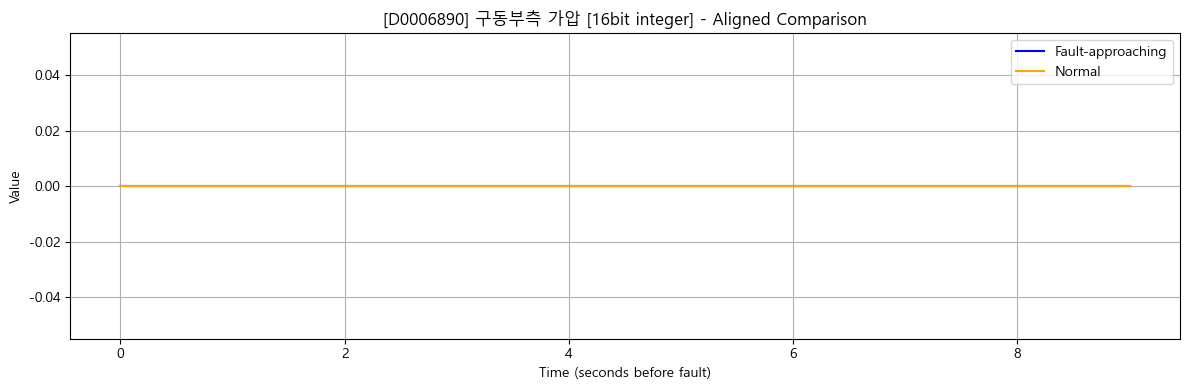

[D0006892] 작업자측 가압 [32bit integer] - No valid DTW data.


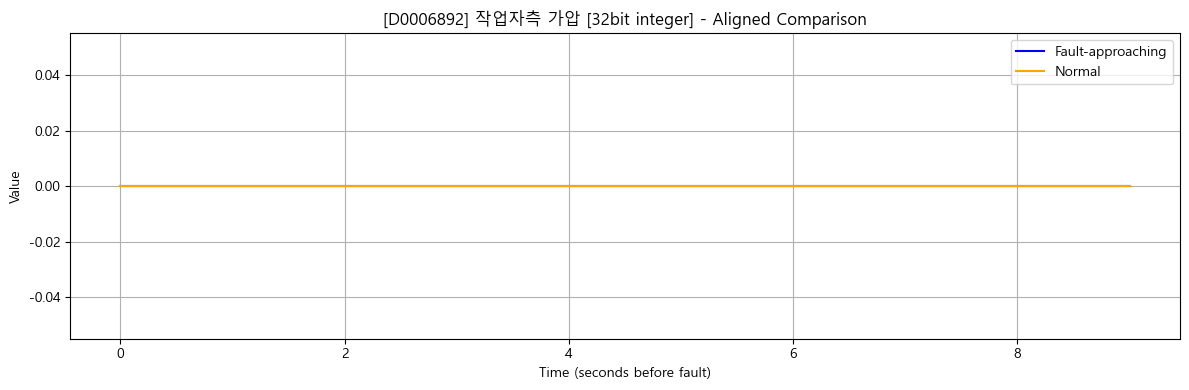

[D0006894] 구동부측 역압 [32bit integer] - Average DTW Distance: 70.93


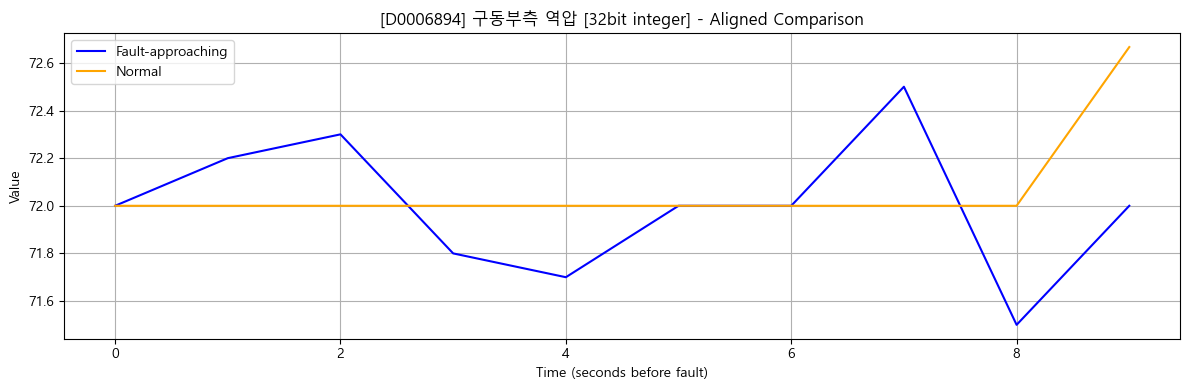

[D0006896] 작업자측 역압 [32bit integer] - Average DTW Distance: 70.59


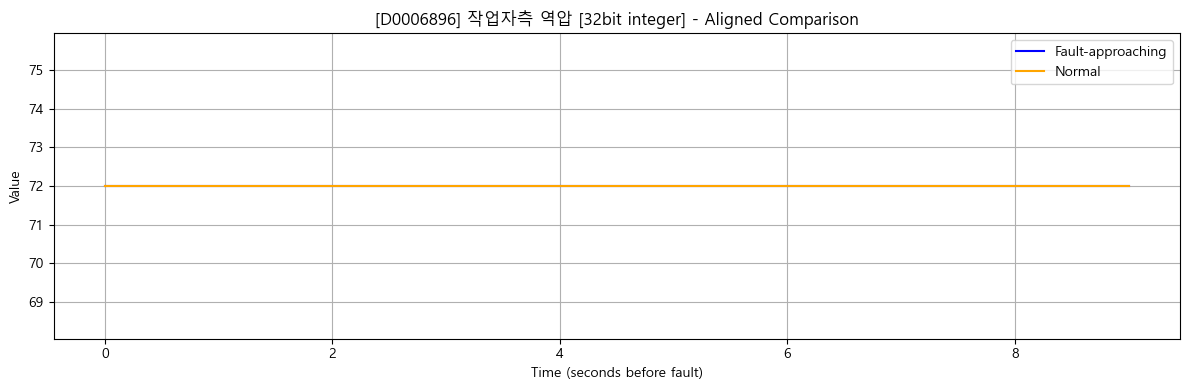

In [54]:
gap_pressure_size_vars = [
    '[D0006340] 메인롤 외경 PV [32bit integer]',
    '[D0006932] 리와인더 외경[mm] [32bit integer]',
    '[D0006860] 구동부측 GAP [32bit integer]',
    '[D0006862] 작업자측 GAP [32bit integer]',
    '[D0006864] 구동부측 이전 GAP [32bit integer]',
    '[D0006866] 작업자측 이전 GAP [32bit integer]',
    '[D0006890] 구동부측 가압 [16bit integer]',
    '[D0006892] 작업자측 가압 [32bit integer]',
    '[D0006894] 구동부측 역압 [32bit integer]',
    '[D0006896] 작업자측 역압 [32bit integer]'
]

from fastdtw import fastdtw
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

for var in gap_pressure_size_vars:
    # DTW distance calculation
    distances = []
    for fault_seg, normal_seg in zip(fault_segments, normal_segments):
        fault_seq = fault_seg[var].values
        normal_seq = normal_seg[var].values

        if np.isnan(fault_seq).any() or np.isnan(normal_seq).any():
            continue

        distance, path = fastdtw(fault_seq, normal_seq)
        distances.append(distance)

    avg_distance = np.mean(distances) if distances else None
    print(f"{var} - Average DTW Distance: {avg_distance:.2f}" if avg_distance else f"{var} - No valid DTW data.")

    # Aligned visualization
    fault_seq = fault_segments[0][var].values
    normal_seq = normal_segments[0][var].values
    time_axis = np.arange(len(fault_seq))

    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, fault_seq, label='Fault-approaching', color='blue')
    plt.plot(time_axis, normal_seq, label='Normal', color='orange')
    plt.title(f"{var} - Aligned Comparison")
    plt.xlabel('Time (seconds before fault)')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [45]:
df_1.loc[df_1['L50_shift'] == 1]

,ds,[D0006074] 강제연신롤 인터락 속도 PV [16bit integer],[D0006310] 최대속도 PV [32bit integer],[D0006316] 리와인더 장력 테파 PV [32bit integer],[D0006318] 인피더 롤 속도비 PV [32bit integer],[D0006336] 메인롤 연속 회전 속도 PV [32bit integer],[D0006340] 메인롤 외경 PV [32bit integer],[D0006348] 메인롤 수동 속도 PV [32bit integer],[D0006366] 강제연신기 속도비 PV [32bit integer],[D0006368] 강제연신롤 수동 속도 PV [16bit integer],...,강제연신롤수동속도차이,강제연신롤인터락속도차이,"파단시 UW,RW 닙바 하강 시간차이",생산길이알림거리설정차이,두께측정기알람속도차이,두께측정기알람시간차이,유도가열온도DS차이,유도가열온도WS차이,[L50] 단선 [Bit],L50_shift
4323,2025-01-16 15:50:02,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,3.500000,1.0,1.0
4324,2025-01-16 15:50:03,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.700000,37.500000,1.0,1.0
4325,2025-01-16 15:50:04,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,103.800000,106.300000,1.0,1.0
4326,2025-01-16 15:50:05,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,143.300000,161.800000,1.0,1.0
4327,2025-01-16 15:50:06,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,149.250000,170.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392537,2025-01-21 03:40:16,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,140.142857,144.714286,1.0,1.0
392538,2025-01-21 03:40:17,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,148.500000,167.500000,1.0,1.0
392539,2025-01-21 03:40:18,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.000000,170.000000,1.0,1.0
392540,2025-01-21 03:40:19,30.0,60.0,10.0,100.0,50.0,7500.0,40.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.000000,170.000000,1.0,1.0


In [ ]:
## find the index of 4

df_1[df_1['ds'] == '2023-10-01 14:32:00']

In [ ]:
df_1

In [60]:
df_1.to_csv('엔솔_정상_이상.csv', index=False, encoding='utf-8-sig')

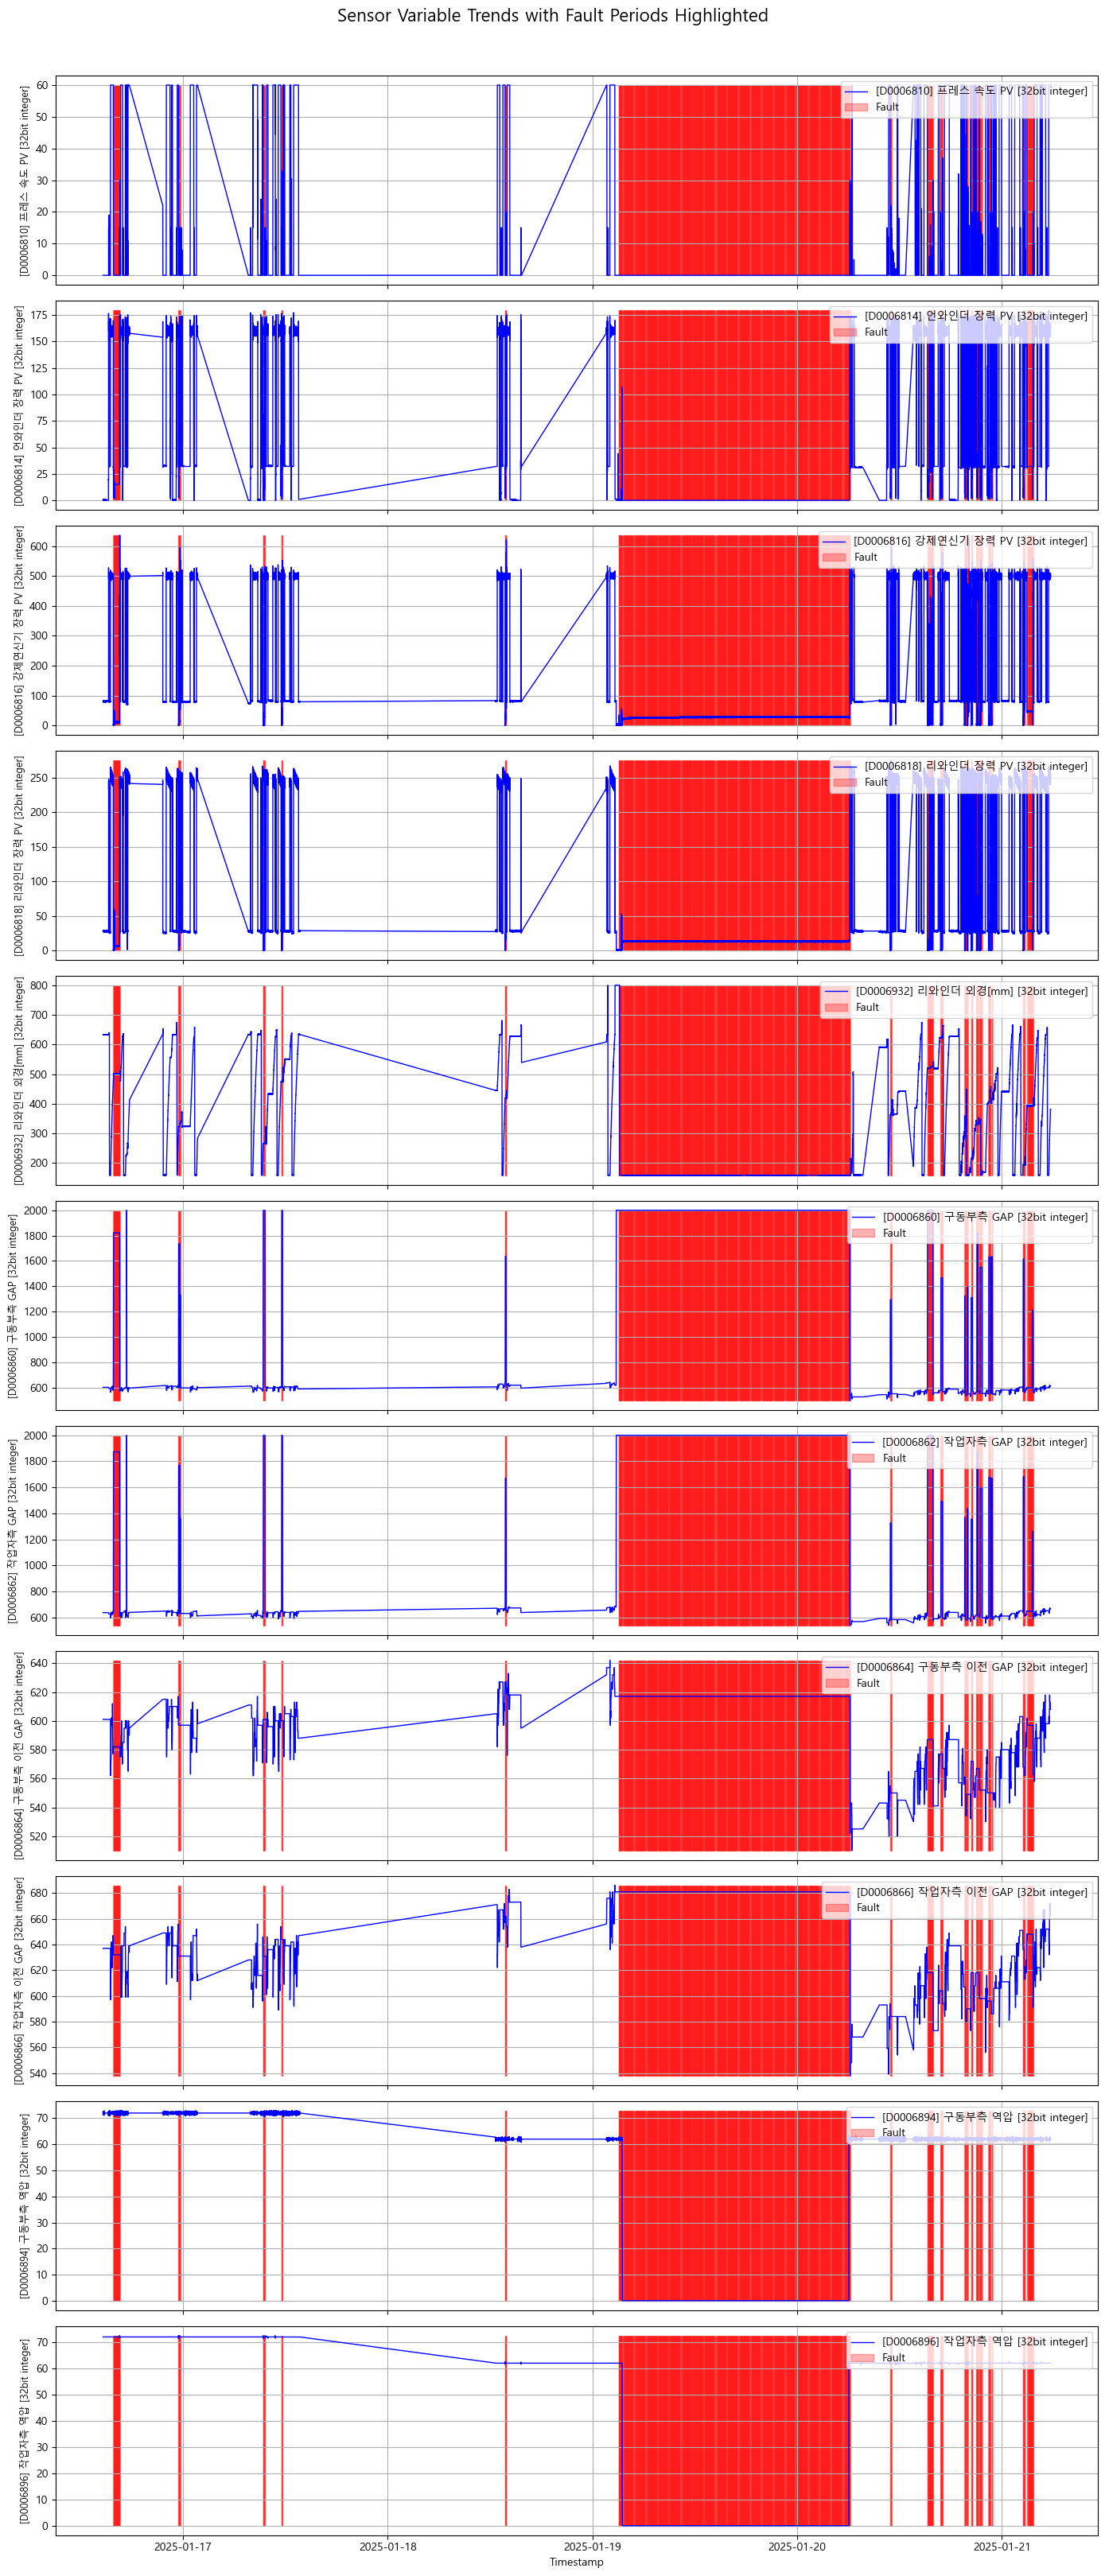

In [61]:
# Define the variables you want to plot
variables = [
    '[D0006810] 프레스 속도 PV [32bit integer]',
    '[D0006814] 언와인더 장력 PV [32bit integer]',
    '[D0006816] 강제연신기 장력 PV [32bit integer]',
    '[D0006818] 리와인더 장력 PV [32bit integer]',
    '[D0006932] 리와인더 외경[mm] [32bit integer]',
    '[D0006860] 구동부측 GAP [32bit integer]',
    '[D0006862] 작업자측 GAP [32bit integer]',
    '[D0006864] 구동부측 이전 GAP [32bit integer]',
    '[D0006866] 작업자측 이전 GAP [32bit integer]',
    '[D0006894] 구동부측 역압 [32bit integer]',
    '[D0006896] 작업자측 역압 [32bit integer]'
]


# Plot each variable with fault highlighting
fig, axs = plt.subplots(len(variables), 1, figsize=(14, 3 * len(variables)), sharex=True)

for i, var in enumerate(variables):
    axs[i].plot(df_1['ds'], df_1[var], label=var, color='blue', linewidth=1)
    
    # Highlight fault regions
    fault_mask = df_1['[L50] 단선 [Bit]'] == 1
    axs[i].fill_between(df_1['ds'], df_1[var].min(), df_1[var].max(), where=fault_mask, color='red', alpha=0.3, label='Fault')
    
    axs[i].set_ylabel(var, fontsize=9)
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

plt.xlabel('Timestamp')
plt.suptitle('Sensor Variable Trends with Fault Periods Highlighted', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()